In [1]:
# Load the libraries
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

In [2]:
# Mount file to google drive
from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [3]:
# Load the dataframe
df=pd.read_excel('/drive/My Drive/Colab Notebooks/INF2178_A1_data.xlsx')

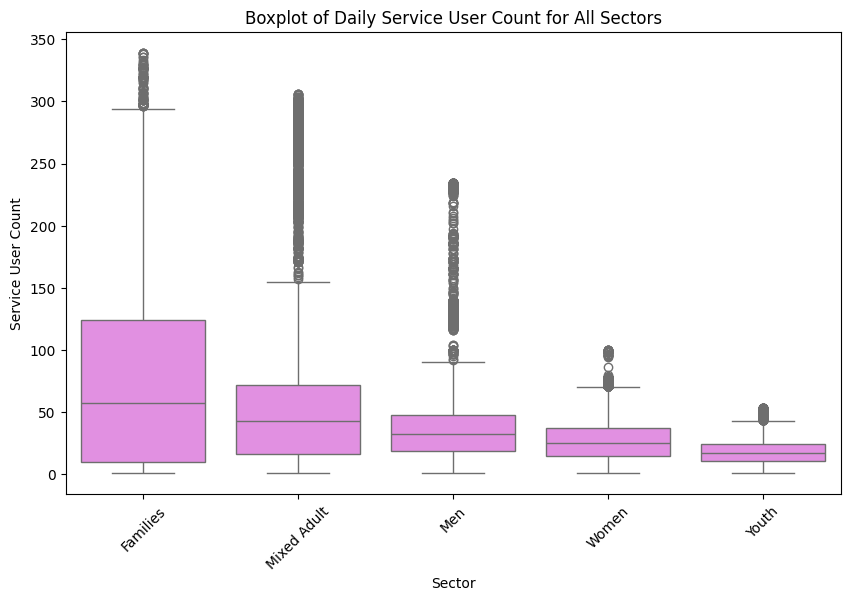

In [4]:
# Boxplot for daily SERVICE_USER_COUNT for all Sectors
plt.figure(figsize=(10, 6))
sns.boxplot(x='SECTOR', y='SERVICE_USER_COUNT', data=df, color='violet')
plt.title('Boxplot of Daily Service User Count for All Sectors')
plt.xlabel('Sector')
plt.ylabel('Service User Count')
plt.xticks(rotation=45)
plt.show()

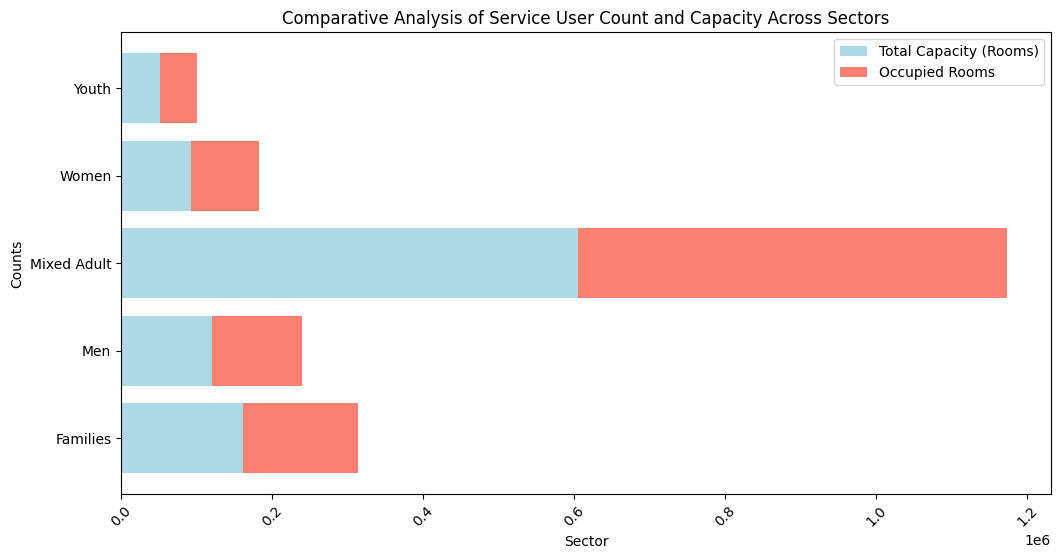

In [5]:
# Create a stacked barchart on room-based occupancy vs total capacity for all Sectors

# Aggregate the data by sector
room_sector_aggregated = df.groupby('SECTOR')[['OCCUPIED_ROOMS', 'CAPACITY_ACTUAL_ROOM']].sum().reset_index()

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
plt.barh(room_sector_aggregated['SECTOR'], room_sector_aggregated['CAPACITY_ACTUAL_ROOM'],
         label='Total Capacity (Rooms)', color='lightblue')
plt.barh(room_sector_aggregated['SECTOR'], room_sector_aggregated['OCCUPIED_ROOMS'],
         left=room_sector_aggregated['CAPACITY_ACTUAL_ROOM'], label='Occupied Rooms', color='salmon')

plt.xlabel('Sector')
plt.ylabel('Counts')
plt.title('Comparative Analysis of Service User Count and Capacity Across Sectors')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [6]:
# Calculate room_sector_aggregated rate
room_sector_aggregated['OCCUPANCY_RATE'] = room_sector_aggregated['OCCUPIED_ROOMS'] / room_sector_aggregated['CAPACITY_ACTUAL_ROOM']

print(room_sector_aggregated)

        SECTOR  OCCUPIED_ROOMS  CAPACITY_ACTUAL_ROOM  OCCUPANCY_RATE
0     Families        151957.0              161952.0        0.938284
1          Men        119489.0              119872.0        0.996805
2  Mixed Adult        568075.0              605052.0        0.938886
3        Women         90661.0               92048.0        0.984932
4        Youth         48968.0               51237.0        0.955716


In [7]:
# Perform t-test on SERVICE_USER_COUNT by sector, Women vs Men

# Group the data for "Women" and "Men"
woman_service_count = df[df['SECTOR'].isin(['Women'])]['SERVICE_USER_COUNT']
men_service_count = df[df['SECTOR'].isin(['Men'])]['SERVICE_USER_COUNT']

# Perform a t-test between these groups
t_stat_service_count, p_value_service_count = ttest_ind(woman_service_count.dropna(), men_service_count.dropna(), equal_var=False)

# Output the results
print(f"T-statistic: {t_stat_service_count}, P-value: {p_value_service_count}")

T-statistic: -30.50421164151915, P-value: 1.0532742925183108e-199


In [8]:
# Perform t-test on room-based ocupancy rate for "Women and Youth" vs "Men, Mixed Adult, and Families"

# Separate the data based on CAPACITY_TYPE
room_based_data = df[df['CAPACITY_TYPE'] == 'Room Based Capacity']

# Calculate the occupancy rate for Room Based Capacity
room_based_data['OCCUPANCY_RATE'] = room_based_data['OCCUPIED_ROOMS'] / room_based_data['CAPACITY_ACTUAL_ROOM']

# Grouping for Room Based Capacity
woman_room = room_based_data[room_based_data['SECTOR'].isin(['Women'])]['OCCUPANCY_RATE']
men_room = room_based_data[room_based_data['SECTOR'].isin(['Men'])]['OCCUPANCY_RATE']

# Perform a t-test for Room Based Capacity
t_stat_room, p_value_room = ttest_ind(woman_room.dropna(), men_room.dropna(), equal_var=False)

# Output the result
print("Room Based Capacity:")
print(f"T-statistic: {t_stat_room}, P-value: {p_value_room}")

Room Based Capacity:
T-statistic: -13.729207701163253, P-value: 2.3324018592726617e-41


<ipython-input-8-012b3b0c0fd5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  room_based_data['OCCUPANCY_RATE'] = room_based_data['OCCUPIED_ROOMS'] / room_based_data['CAPACITY_ACTUAL_ROOM']


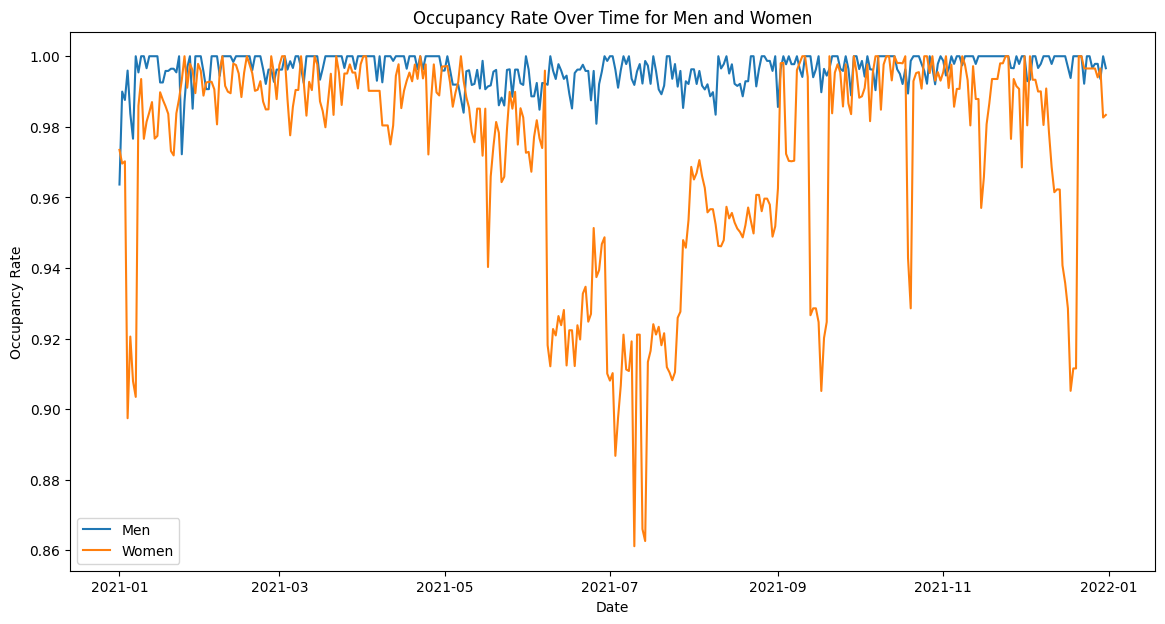

In [9]:
# Create a pivot table to set the column to sectors
pivot_data = room_based_data.pivot_table(index='OCCUPANCY_DATE', columns='SECTOR', values='OCCUPANCY_RATE')

# Update the pivot table to contain only Men and Women
pivot_data = pivot_data[['Men', 'Women']]

# Plot each sector's occupancy rate over time
plt.figure(figsize=(14, 7))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], label=column)

# Adding titles and labels
plt.title('Occupancy Rate Over Time for Men and Women')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate')
plt.legend()
plt.show()